In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import time
import math
import experiments.toy_regression as exp

In [2]:
device = torch.device("cpu")

In [7]:
batch_size = 20
noise = torch.tensor(0.02).to(device) # 3, 0.02
layers = [
    ("fc", (1, 32)),
    ("relu", ()),
    ("fc", (32, 32)),
    ("relu", ()),
    ("fc", (32, 32)),
    ("relu", ()),
    ("fc", (32, 1))
]
learn_var = False

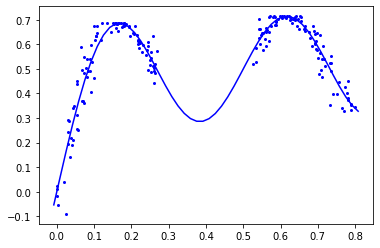

In [4]:
from training import toy
import matplotlib.pyplot as plt

torch.manual_seed(42)

trainset = toy.TrigonometricToyDataset(sample_count=200, noise=0.02, normalize=False, max=0.8, skip=0.25)
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True)

axis = plt.subplot()
trainset.plot_dataset(axis)

In [5]:
torch.manual_seed(42)
gp, gp_true_lml = exp.gaussian_process(100, trainset.normalized_xs, trainset.normalized_ys)

Epoch 0: loss 0.7717236280441284
Epoch 20: loss -0.03826034441590309
Epoch 40: loss -0.9466961026191711
Epoch 60: loss -1.4638110399246216
Epoch 80: loss -1.4640426635742188


In [59]:
torch.manual_seed(42)
pp = exp.point_estimator(layers, noise, learn_var, 900, trainloader, batch_size, device)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Epoch 0: loss -0.019352035596966743
Epoch 100: loss -0.06830703467130661
Epoch 200: loss -0.08435721695423126
Epoch 300: loss -0.08422008156776428
Epoch 400: loss -0.08660231530666351
Epoch 500: loss -0.08756429702043533
Epoch 600: loss -0.08791010081768036
Epoch 700: loss -0.08910311758518219
Epoch 800: loss -0.09187067300081253
Final loss -0.09304627776145935


In [72]:
torch.manual_seed(42)
swag_config = {
    "start_epoch": 700,
    "update_every_batches": len(trainloader),
    "update_every_epochs": 1,
    "deviation_samples": 50
}
swag = exp.swag(layers, noise, learn_var, 900, swag_config, trainloader, batch_size, device)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Epoch 0: loss -0.019352035596966743
Epoch 100: loss -0.06830703467130661
Epoch 200: loss -0.08435721695423126
Epoch 300: loss -0.08422008156776428
Epoch 400: loss -0.08660231530666351
Epoch 500: loss -0.08756429702043533
Epoch 600: loss -0.08791010081768036
SWAG: starting to collect samples at epoch 700, batch 9
Epoch 700: loss -0.08910311758518219
Epoch 800: loss -0.09187067300081253
Final loss -0.09304627776145935


In [72]:
torch.manual_seed(42)
ensemble = exp.ensemble(5, layers, noise, learn_var, 900, trainloader, batch_size, parallel=False)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1)

In [9]:
torch.manual_seed(42)
mc_dropout = exp.mc_dropout(0.1, layers, noise, learn_var, 900, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=35, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=35, out_features=35, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=35, out_features=35, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.1, inplace=False)
  (9): Linear(in_features=35, out_features=1, bias=True)
)
Epoch 0: loss -0.04623353108763695
Epoch 100: loss -0.08249913901090622
Epoch 200: loss -0.08788342773914337
Epoch 300: loss -0.08822451531887054
Epoch 400: loss -0.09039641171693802
Epoch 500: loss -0.08920774608850479
Epoch 600: loss -0.08926518261432648
Epoch 700: loss -0.09027083218097687
Epoch 800: loss -0.0911581963300705
Final loss -0.09162870049476624


In [77]:
torch.manual_seed(42)
intel_bbb = exp.intel_bbb(layers, noise, learn_var, 20000, trainloader, batch_size)

Generated model: Sequential(
  (0): Linear(in_features=1, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
)
Epoch 0: loss 0.11826364696025848
Epoch 100: loss -0.02148934081196785
Epoch 200: loss -0.015870604664087296
Epoch 300: loss -0.026180341839790344
Epoch 400: loss -0.028339479118585587
Epoch 500: loss -0.03217969462275505
Epoch 600: loss -0.030917448922991753
Epoch 700: loss -0.036478448659181595
Epoch 800: loss -0.029506834223866463
Epoch 900: loss -0.03316636383533478
Epoch 1000: loss -0.03626189008355141
Epoch 1100: loss -0.035796888172626495
Epoch 1200: loss -0.033600226044654846
Epoch 1300: loss -0.039416298270225525
Epoch 1400: loss -0.03510246425867081
Epoch 1500: loss -0.03554914891719818
Epoch 1600: loss -0.03691516071557999
Epoch 1700: loss -0.038087476044893265
Epoch 1800: loss

In [8]:
torch.manual_seed(42)
bbb = exp.bbb(layers, noise, learn_var, 1000, trainloader, batch_size, device, kl_rescaling=5)

Generated model: Sequential(
  (0): BBBLinear()
  (1): ReLU()
  (2): BBBLinear()
  (3): ReLU()
  (4): BBBLinear()
  (5): ReLU()
  (6): BBBLinear()
)
4418 trainable parameters
Epoch 0: loss 28.666400909423828
Epoch 10: loss 25.907188415527344
Epoch 20: loss 23.815073013305664
Epoch 30: loss 21.75188636779785
Epoch 40: loss 19.747230529785156
Epoch 50: loss 17.80454444885254
Epoch 60: loss 15.929327011108398
Epoch 70: loss 14.147411346435547
Epoch 80: loss 12.440347671508789
Epoch 90: loss 10.778949737548828
Epoch 100: loss 9.2808256149292
Epoch 110: loss 7.9203386306762695
Epoch 120: loss 6.662287712097168
Epoch 130: loss 5.593206405639648
Epoch 140: loss 4.616804599761963
Epoch 150: loss 3.7797539234161377
Epoch 160: loss 3.1893815994262695
Epoch 170: loss 2.546722173690796
Epoch 180: loss 2.0708096027374268
Epoch 190: loss 1.6653473377227783
Epoch 200: loss 1.3517251014709473
Epoch 210: loss 1.1103782653808594
Epoch 220: loss 1.0971144437789917
Epoch 230: loss 0.8432675004005432
Epoch

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


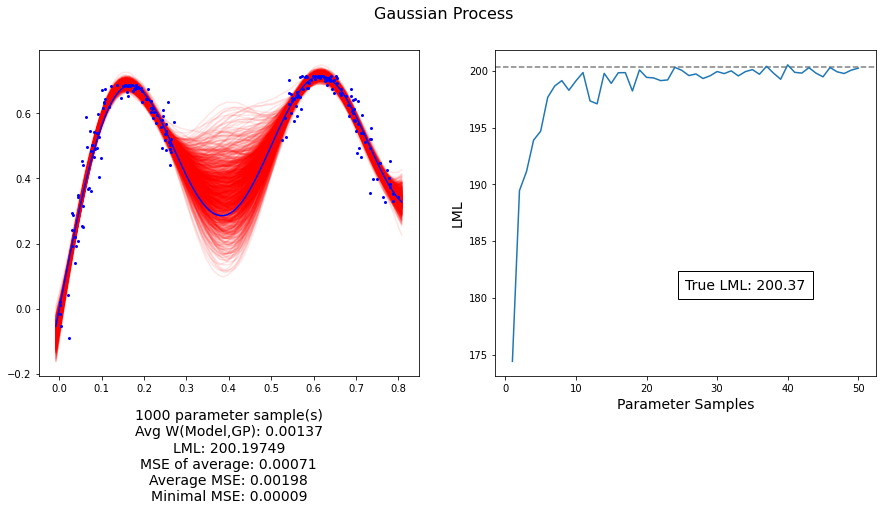

In [51]:
trainset.plot("Gaussian Process", gp, gp, alpha=0.1, samples=1000, plot_lml_trend=(50, 50), gp_lml=gp_true_lml)

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


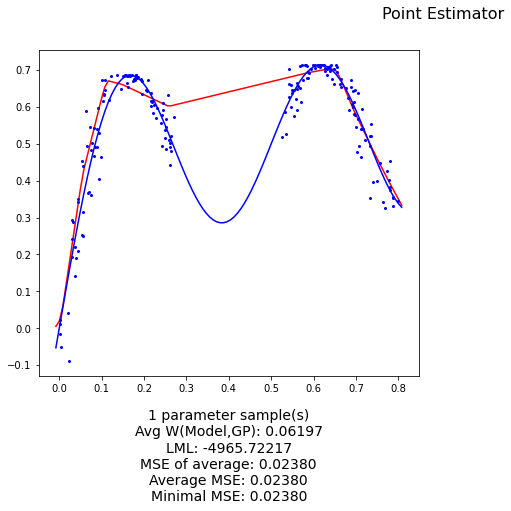

In [60]:
trainset.plot("Point Estimator", pp, gp, alpha=1, samples=1)

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


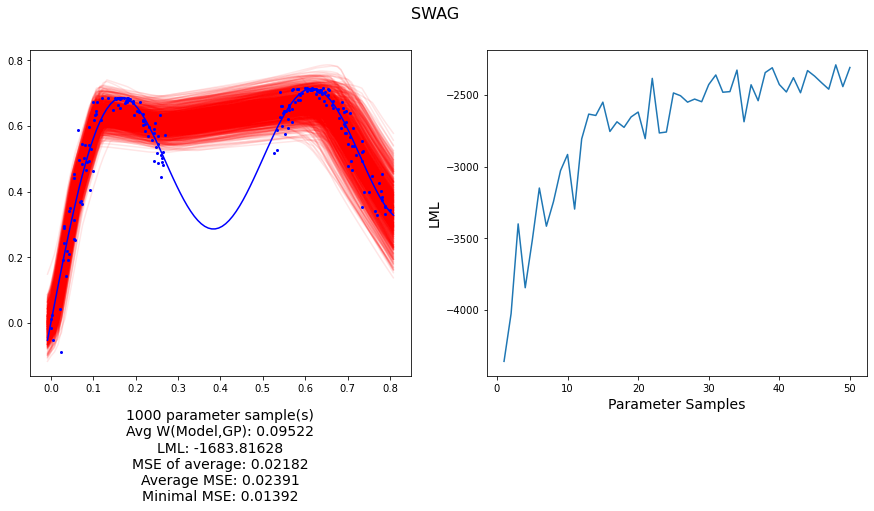

In [73]:
trainset.plot("SWAG", swag, gp, alpha=0.1, samples=1000, plot_lml_trend=(50, 50))

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


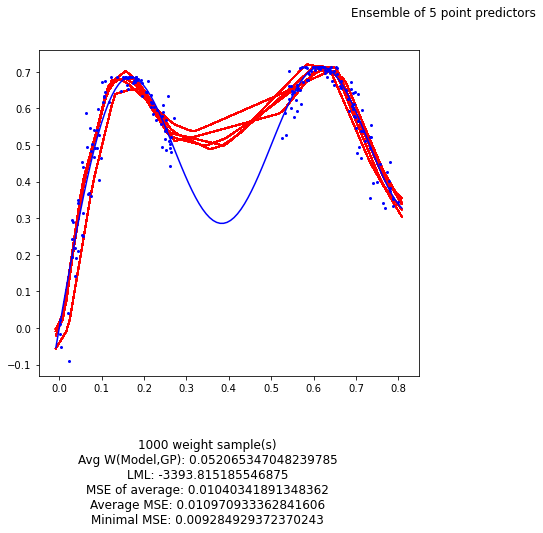

In [73]:
trainset.plot("Ensemble of 5 point predictors", ensemble, gp, alpha=0.1, samples=1000)

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


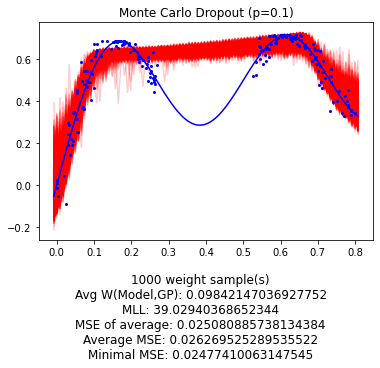

In [14]:
trainset.plot("Monte Carlo Dropout (p=0.1)", mc_dropout, gp, alpha=0.2, samples=1000)

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


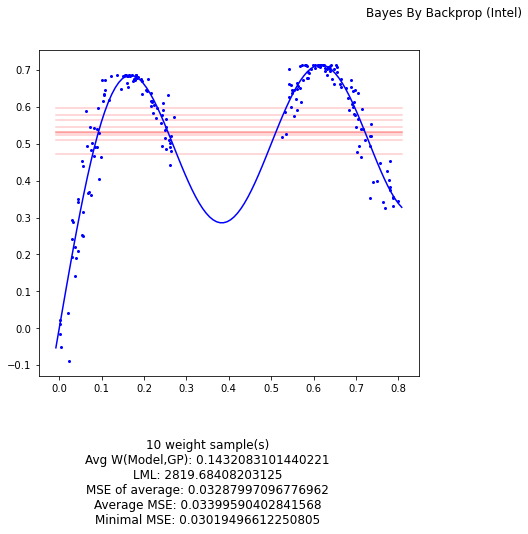

In [79]:
trainset.plot("Bayes By Backprop (Intel)", intel_bbb, gp, alpha=0.2, samples=10)

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


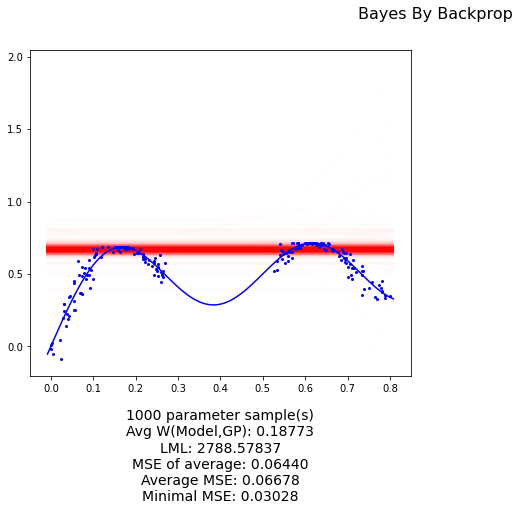

In [9]:
trainset.plot("Bayes By Backprop", bbb, gp, alpha=0.01, samples=1000)

C:\Users\flose\.conda\envs\ml\lib\site-packages\gpytorch\utils\cholesky.py:38: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(


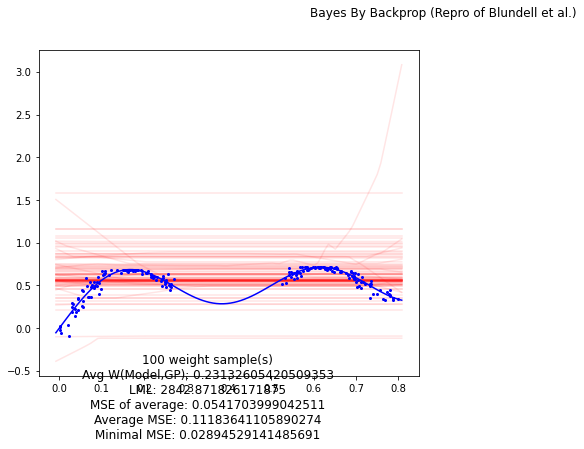

In [66]:
trainset.plot("Bayes By Backprop (Repro of Blundell et al.)", eval_blundell, gp, alpha=0.1, samples=100)